# Collecting Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Makaan_Properties_Buy_Cleaned _Compressed.csv', encoding='iso-8859-1')

/var/folders/7d/m8_kx24j6sq09t_qm82k6hmc0000gn/T/ipykernel_1667/1330810427.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Makaan_Properties_Buy_Cleaned _Compressed.csv', encoding='iso-8859-1')


In [3]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514.0,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414.0,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118.0,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295.0,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040.0,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


# Dataset Pre Processing and Cleaning

In [4]:
housing = df.drop(['Property_Name', 'Property_id', 'Posted_On', 'Project_URL', 'builder_id', 'Builder_name',
                   'Property_building_status', 'Longitude', 'Latitude','description','listing_domain_score','Listing_Category','City_name','Locality_Name','Sub_urban_name','is_commercial_Listing'], axis=1)


In [5]:
housing.head()

,Property_type,Property_status,Price_per_unit_area,City_id,No_of_BHK,Locality_ID,Price,Size,Sub_urban_ID,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
0,Apartment,Under Construction,"4,285",1.0,3 BHK,51907.0,"75,00,000","1,750 sq ft",10229.0,Unfurnished,False,True,True,False,False,False
1,Apartment,Under Construction,"7,000",1.0,4 BHK,56407.0,"2,36,88,000","3,384 sq ft",10229.0,Unfurnished,False,True,True,False,False,False
2,Apartment,Ready to move,"5,752",1.0,3 BHK,66627.0,"1,32,00,840","2,295 sq ft",10229.0,Unfurnished,False,False,True,True,False,False
3,Apartment,Ready to move,"2,486",1.0,2 BHK,51899.0,"22,83,000",918 sq ft,10228.0,Unfurnished,False,False,True,True,False,False
4,Apartment,Under Construction,"5,324",1.0,3 BHK,50368.0,"93,71,000","1,760 sq ft",10229.0,Unfurnished,False,True,True,False,False,False


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150435 entries, 0 to 150434
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Property_type        150432 non-null  object 
 1   Property_status      143993 non-null  object 
 2   Price_per_unit_area  150432 non-null  object 
 3   City_id              150432 non-null  float64
 4   No_of_BHK            150432 non-null  object 
 5   Locality_ID          150432 non-null  float64
 6   Price                150432 non-null  object 
 7   Size                 150432 non-null  object 
 8   Sub_urban_ID         150432 non-null  float64
 9   is_furnished         150432 non-null  object 
 10  is_plot              150432 non-null  object 
 11  is_RERA_registered   150432 non-null  object 
 12  is_Apartment         150432 non-null  object 
 13  is_ready_to_move     150432 non-null  object 
 14  is_PentaHouse        150432 non-null  object 
 15  is_studio        

In [7]:
housing.describe()

,City_id,Locality_ID,Sub_urban_ID
count,150432.000000,150432.000000,150432.000000
mean,12.475005,53916.654734,10118.512730
std,6.890446,12653.212318,162.422186
min,1.000000,50001.000000,10003.000000
25%,5.000000,50063.000000,10040.000000
50%,16.000000,51195.000000,10043.000000
75%,18.000000,51943.000000,10202.000000
max,23.000000,173237.000000,11613.000000


In [8]:
columns_to_clean = ['Price', 'Price_per_unit_area']

In [9]:
for col in columns_to_clean:
    housing[col] = housing[col].str.replace(',', '')
    housing[col] = housing[col].astype(float)

In [10]:
housing['No_of_BHK'] = housing['No_of_BHK'].str.replace('BHK', '').str.replace('RK', '')

housing['No_of_BHK'] = housing['No_of_BHK'].astype(float)


In [11]:
housing['Size'] = housing['Size'].str.replace(' sq ft', '').str.replace(',', '')

housing['Size'] = housing['Size'].astype(float)

In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
columns_to_encode = ['Property_type', 'Property_status','is_furnished']
encoder = LabelEncoder()

In [14]:
for col in columns_to_encode:
    housing[col] = encoder.fit_transform(housing[col])


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [16]:
print(housing.dtypes)

Property_type            int64
Property_status          int64
Price_per_unit_area    float64
City_id                float64
No_of_BHK              float64
Locality_ID            float64
Price                  float64
Size                   float64
Sub_urban_ID           float64
is_furnished             int64
is_plot                 object
is_RERA_registered      object
is_Apartment            object
is_ready_to_move        object
is_PentaHouse           object
is_studio               object
dtype: object


In [17]:
housing = housing.drop_duplicates()
housing.dropna(inplace=True)

In [18]:
numeric_columns = ['Property_status', 'is_furnished', 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_PentaHouse', 'is_studio']
housing[numeric_columns] = housing[numeric_columns].astype(int)



In [19]:
print(housing.dtypes)

Property_type            int64
Property_status          int64
Price_per_unit_area    float64
City_id                float64
No_of_BHK              float64
Locality_ID            float64
Price                  float64
Size                   float64
Sub_urban_ID           float64
is_furnished             int64
is_plot                  int64
is_RERA_registered       int64
is_Apartment             int64
is_ready_to_move         int64
is_PentaHouse            int64
is_studio                int64
dtype: object


In [20]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(housing, infer_dtypes=False)
#prof.to_file(output_file='output.html')

In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Property_type'}>,
        <AxesSubplot:title={'center':'Property_status'}>,
        <AxesSubplot:title={'center':'Price_per_unit_area'}>,
        <AxesSubplot:title={'center':'City_id'}>],
       [<AxesSubplot:title={'center':'No_of_BHK'}>,
        <AxesSubplot:title={'center':'Locality_ID'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Size'}>],
       [<AxesSubplot:title={'center':'Sub_urban_ID'}>,
        <AxesSubplot:title={'center':'is_furnished'}>,
        <AxesSubplot:title={'center':'is_plot'}>,
        <AxesSubplot:title={'center':'is_RERA_registered'}>],
       [<AxesSubplot:title={'center':'is_Apartment'}>,
        <AxesSubplot:title={'center':'is_ready_to_move'}>,
        <AxesSubplot:title={'center':'is_PentaHouse'}>,
        <AxesSubplot:title={'center':'is_studio'}>]], dtype=object)

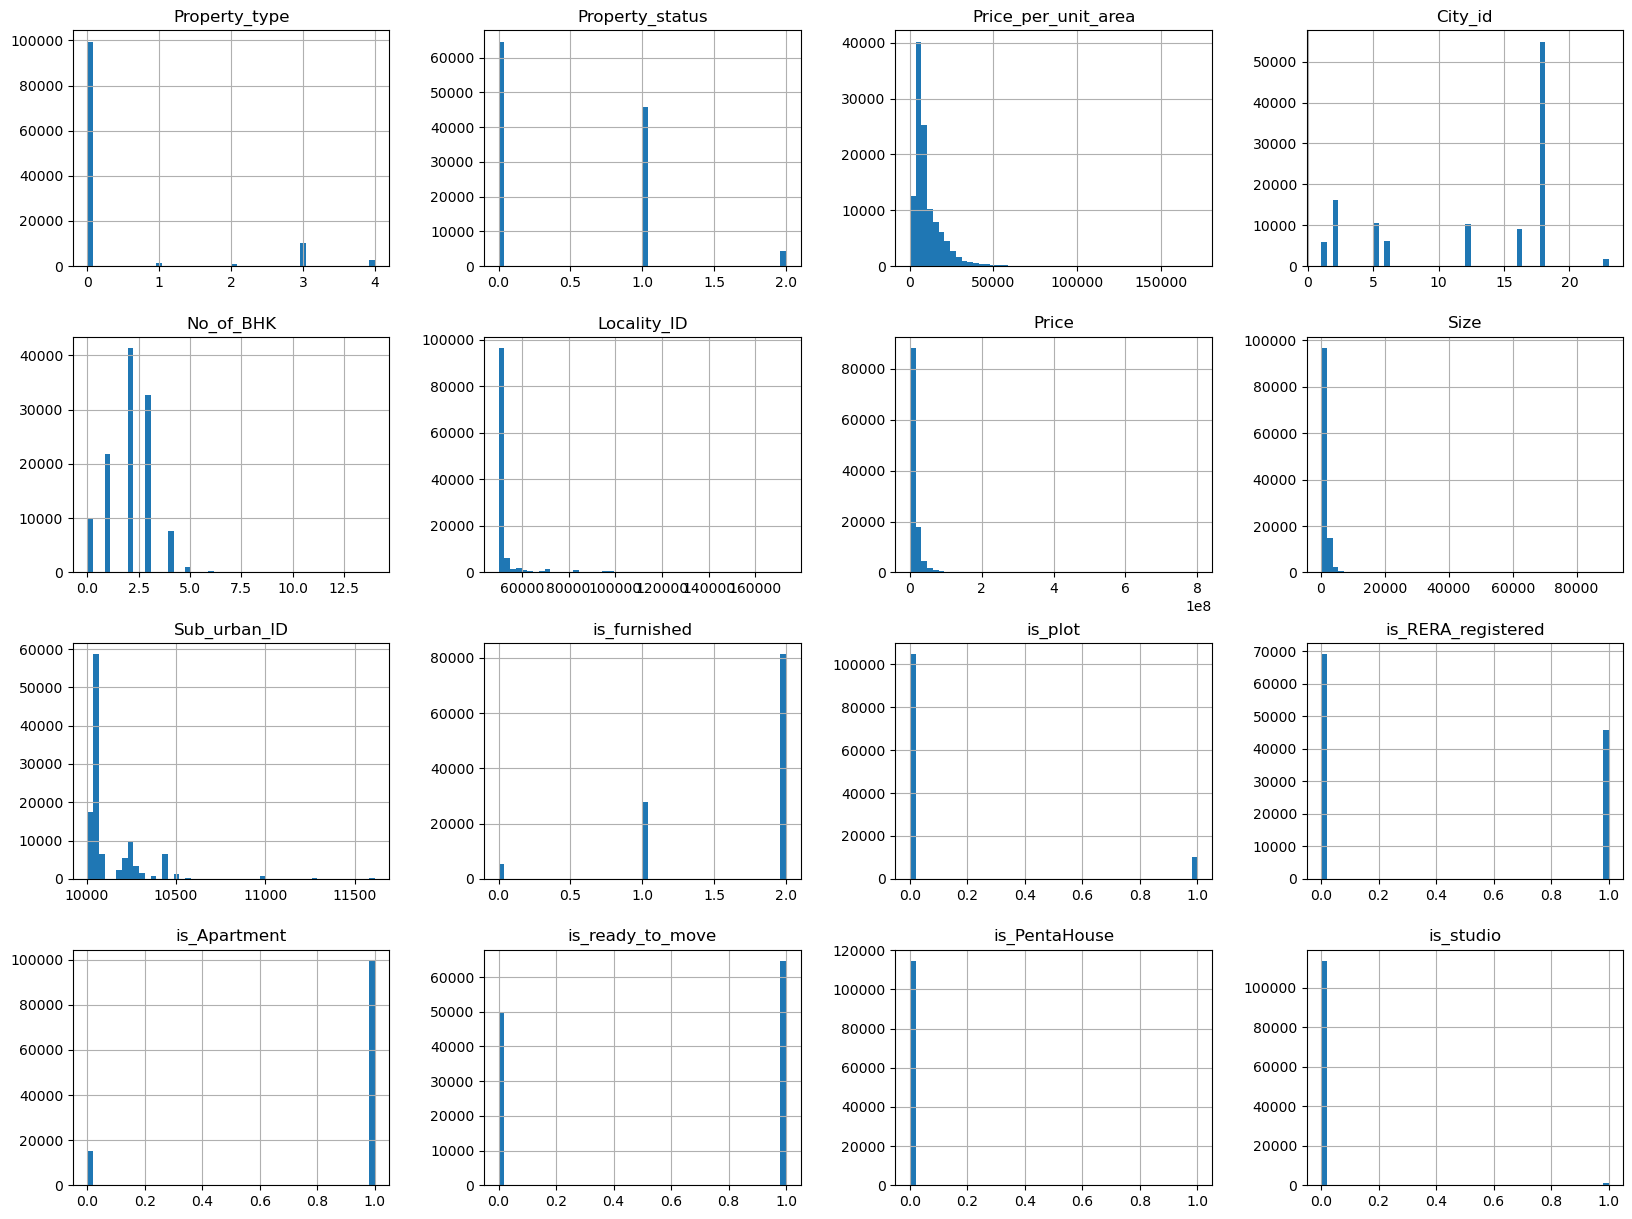

In [23]:
housing.hist(bins=50, figsize = (20,15))

# Train-Test Splitting

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set: 91712
 Rows in test set: 22929



# Correlation

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix['Price'].sort_values(ascending=False)


Price                  1.000000
Price_per_unit_area    0.665816
Size                   0.500475
No_of_BHK              0.466050
is_ready_to_move       0.084570
City_id                0.066324
is_Apartment           0.052146
is_PentaHouse          0.007097
Sub_urban_ID          -0.033530
Property_type         -0.036617
is_RERA_registered    -0.047242
is_studio             -0.047492
Locality_ID           -0.079370
Property_status       -0.106645
is_furnished          -0.108189
is_plot               -0.127412
Name: Price, dtype: float64

In [27]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Price_per_unit_area', ylabel='Price'>,
        <AxesSubplot:xlabel='Size', ylabel='Price'>,
        <AxesSubplot:xlabel='No_of_BHK', ylabel='Price'>,
        <AxesSubplot:xlabel='is_plot', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Price_per_unit_area'>,
        <AxesSubplot:xlabel='Price_per_unit_area', ylabel='Price_per_unit_area'>,
        <AxesSubplot:xlabel='Size', ylabel='Price_per_unit_area'>,
        <AxesSubplot:xlabel='No_of_BHK', ylabel='Price_per_unit_area'>,
        <AxesSubplot:xlabel='is_plot', ylabel='Price_per_unit_area'>],
       [<AxesSubplot:xlabel='Price', ylabel='Size'>,
        <AxesSubplot:xlabel='Price_per_unit_area', ylabel='Size'>,
        <AxesSubplot:xlabel='Size', ylabel='Size'>,
        <AxesSubplot:xlabel='No_of_BHK', ylabel='Size'>,
        <AxesSubplot:xlabel='is_plot', ylabel='Size'>],
       [<AxesSubplot:xlabel='Price', ylabel='No_of_BHK'>,
       

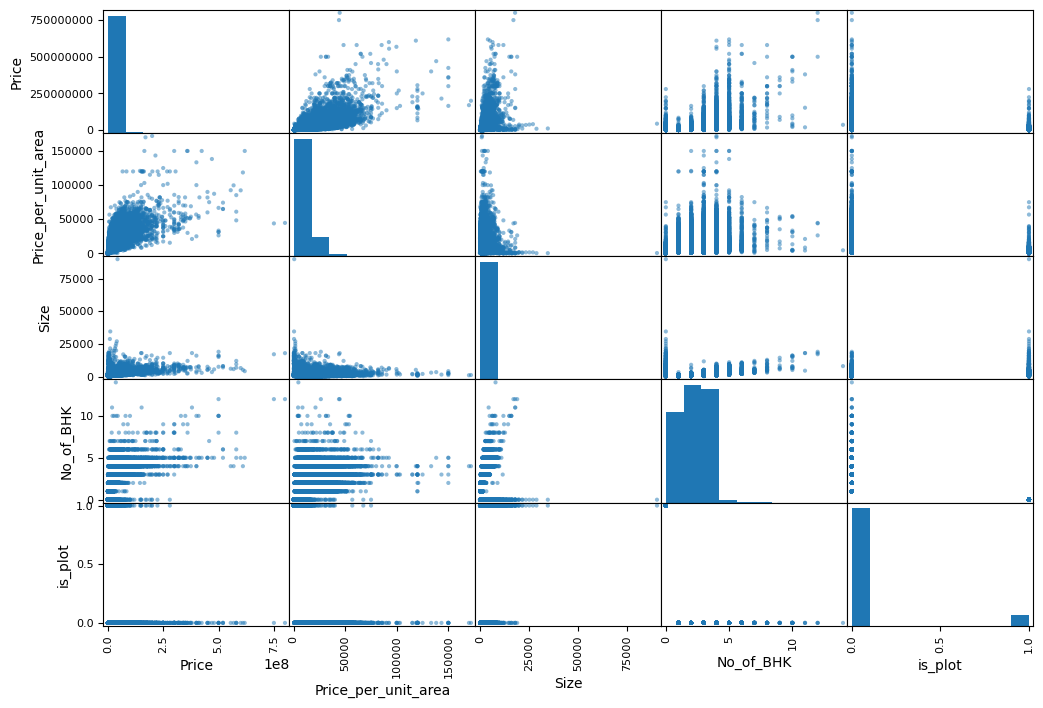

In [28]:
attributes = ['Price','Price_per_unit_area','Size','No_of_BHK','is_plot']
scatter_matrix(housing[attributes],figsize = (12,8))

In [29]:
housing.describe()

,Property_type,Property_status,Price_per_unit_area,City_id,No_of_BHK,Locality_ID,Price,Size,Sub_urban_ID,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
count,114641.000000,114641.000000,114641.000000,114641.000000,114641.000000,114641.000000,1.146410e+05,114641.000000,114641.000000,114641.000000,114641.000000,114641.000000,114641.000000,114641.000000,114641.000000,114641.000000
mean,0.388360,0.472728,10279.370051,12.435856,2.088145,53904.544343,1.365141e+07,1323.900768,10120.808419,1.661064,0.087813,0.398077,0.868145,0.564056,0.000113,0.009019
std,1.037038,0.568179,8785.089263,6.844465,1.102447,12567.723885,2.075753e+07,1012.469691,167.037233,0.565404,0.283024,0.489504,0.338335,0.495882,0.010648,0.094542
min,0.000000,0.000000,100.000000,1.000000,0.000000,50001.000000,3.000000e+03,30.000000,10003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4905.000000,5.000000,1.000000,50063.000000,4.850000e+06,750.000000,10040.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7500.000000,16.000000,2.000000,51209.000000,8.200000e+06,1110.000000,10043.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,12909.000000,18.000000,3.000000,51943.000000,1.519200e+07,1560.000000,10212.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4.000000,2.000000,171969.000000,23.000000,14.000000,173237.000000,8.000000e+08,90000.000000,11613.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
housing = train_set.drop("Price",axis=1)
housing_labels = train_set['Price'].copy()

# Creating a pipeline and Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Property_type', 'Property_status', 'Price_per_unit_area', 'City_id', 'No_of_BHK','Locality_ID',
           'Price','Size','Sub_urban_ID','is_furnished']
train_set[num_vars] = scaler.fit_transform(train_set[num_vars])
test_set[num_vars] = scaler.fit_transform(test_set[num_vars])

In [32]:
test_set.head()

,Property_type,Property_status,Price_per_unit_area,City_id,No_of_BHK,Locality_ID,Price,Size,Sub_urban_ID,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
55652,0.0,0.5,0.018012,0.500000,0.272727,0.364407,0.008218,0.017784,0.049283,1.0,0,1,1,0,0,0
138697,0.0,0.0,0.063722,0.772727,0.181818,0.000016,0.022517,0.014060,0.026201,0.5,0,0,1,1,0,0
100849,0.0,0.5,0.095070,0.772727,0.181818,0.000065,0.022337,0.009270,0.023082,0.5,0,1,1,0,0,0
3233,0.0,0.5,0.024416,0.000000,0.272727,0.044873,0.010355,0.016661,0.140986,1.0,0,1,1,0,0,0
105918,0.0,0.0,0.201014,0.772727,0.272727,0.002653,0.117112,0.023563,0.184654,0.5,0,0,1,1,0,0


In [33]:
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',MinMaxScaler())
])

In [34]:
housing_num = my_pipeline.fit_transform(housing)

In [35]:
housing_num.shape

(91712, 15)

# Model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_num,housing_labels)

DecisionTreeRegressor()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = housing_labels.iloc[:5]

In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([ 4707000.,  4100000., 15000000.,  8400000., 20000000.])

In [41]:
list(some_labels)

[4707000.0, 4100000.0, 15000000.0, 8400000.0, 20000000.0]

# Evaluating the model

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [43]:
lin_mse

2943913553.730497

# Using Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(scores)

/var/folders/7d/m8_kx24j6sq09t_qm82k6hmc0000gn/T/ipykernel_1667/268482606.py:3: RuntimeWarning: invalid value encountered in sqrt
  rmse_scores = np.sqrt(scores)


In [45]:
rmse_scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [46]:
def print_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard Deviation:',scores.std())
        
    

In [47]:
print_scores(rmse_scores)

Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard Deviation: nan


# Testing the model 

In [48]:
X_test = test_set.drop("Price",axis=1)
Y_test = test_set['Price'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions)


[95000. 95000. 95000. ... 95000. 95000. 95000.]
